In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

%matplotlib inline

# Data Understanding

In [2]:
# Read in Data
data = pd.read_csv('data/kc_house_data.csv')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4538103795.03,1108535.84,3.41,2.33,2112.42,16723.60,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2882587298.12,896385.66,0.98,0.89,974.04,60382.60,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2064175145.00,648000.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3874010800.00,860000.00,3.00,2.50,1920.00,7480.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,1300000.00,4.00,3.00,2619.50,10579.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


# Dropping Features

In [5]:
# Dropping Features / Columns that will not be used
# Reason, these features can not be changed (i.e. you can not change the address)

df = data.drop(['greenbelt', 'waterfront', 'heat_source', 'nuisance', 'sewer_system', 'id', 'date', 'sqft_lot', 'sqft_above', 'view', 'yr_built','yr_renovated', 'condition', 'address', 'lat', 'long'], axis=1)

In [6]:
# Dropping Nulls
df = df.dropna()

In [7]:
# Dropping 0 bedrooms and bathrooms  
df = df[df['bedrooms'] != 0]
df = df[df['bathrooms'] != 0]

In [8]:
df_clean = df.copy()

outliers = ['sqft_living','price']

for col in outliers:
    df_clean = df_clean[(df_clean[col] > np.percentile(df_clean[col], .25)) & (df_clean[col] < np.percentile(df_clean[col], 99.75))]

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29799 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29799 non-null  float64
 1   bedrooms       29799 non-null  int64  
 2   bathrooms      29799 non-null  float64
 3   sqft_living    29799 non-null  int64  
 4   floors         29799 non-null  float64
 5   grade          29799 non-null  object 
 6   sqft_basement  29799 non-null  int64  
 7   sqft_garage    29799 non-null  int64  
 8   sqft_patio     29799 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.3+ MB


In [10]:
df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_garage,sqft_patio
count,29799.00,29799.00,29799.00,29799.00,29799.00,29799.00,29799.00,29799.00
mean,1077480.62,3.42,2.33,2099.59,1.54,471.87,329.56,215.58
std,698176.62,0.96,0.86,913.64,0.57,566.64,281.91,239.90
min,92929.00,1.00,0.50,540.00,1.00,0.00,0.00,0.00
25%,650000.00,3.00,2.00,1420.00,1.00,0.00,0.00,40.00
50%,860000.00,3.00,2.50,1920.00,1.50,0.00,400.00,150.00
75%,1300000.00,4.00,3.00,2610.00,2.00,940.00,510.00,310.00
max,6500000.00,11.00,9.50,6630.00,4.00,4000.00,3580.00,4370.00


In [11]:
df_clean.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_basement,sqft_garage,sqft_patio
0,675000.00,4,1.00,1180,1.00,7 Average,0,0,40
1,920000.00,5,2.50,2770,1.00,7 Average,1570,0,240
2,311000.00,6,2.00,2880,1.00,7 Average,1580,0,0
3,775000.00,3,3.00,2160,2.00,9 Better,1070,200,270
4,592500.00,2,2.00,1120,2.00,7 Average,550,550,30
5,625000.00,2,1.00,1190,1.00,7 Average,0,300,0
6,1317227.00,3,3.00,2080,1.00,9 Better,0,0,150
7,820000.00,3,2.50,2214,2.00,8 Good,0,440,206
8,780000.00,4,2.50,2340,2.00,8 Good,0,440,70
9,975000.00,4,2.50,2980,2.00,8 Good,0,540,170


In [12]:
# Dropping outliers without losing 10% of data

df_clean = df.copy()
outliers = ['sqft_living', 'price']
for col in outliers:
    df_clean = df_clean[(df_clean[col] > 
                        np.percentile(df_clean[col], .25)) 
                        & (df_clean[col] < np.percentile(df_clean[col], 99.75))]

In [13]:
df_clean = df_clean[df_clean['bedrooms'] != 0]
df_clean = df_clean[df_clean['bedrooms'] != 0]

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29799 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29799 non-null  float64
 1   bedrooms       29799 non-null  int64  
 2   bathrooms      29799 non-null  float64
 3   sqft_living    29799 non-null  int64  
 4   floors         29799 non-null  float64
 5   grade          29799 non-null  object 
 6   sqft_basement  29799 non-null  int64  
 7   sqft_garage    29799 non-null  int64  
 8   sqft_patio     29799 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.3+ MB


In [15]:
# Changing basement, patio, and garage to binary
# 1 (YES) the property has one or 0 (NO) the property does not have one

df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['sqft_garage'] = df['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
df['sqft_patio'] = df['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)

# Numeric Features

## Visuals

In [16]:
# Creating dataframe for numerics
df_numeric = df_clean[['price', 'sqft_living']]
df_numeric.head()

,price,sqft_living
0,675000.00,1180
1,920000.00,2770
2,311000.00,2880
3,775000.00,2160
4,592500.00,1120


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

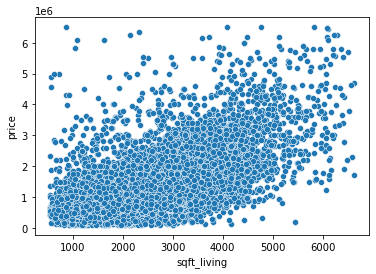

In [17]:
sns.scatterplot(x='sqft_living', y='price', data=df_numeric)

## Simple Linear Regression

In [18]:
df_numeric.corr()['price'].sort_values(ascending=False)

price         1.00
sqft_living   0.65
Name: price, dtype: float64

In [19]:
# Simple Linear Regression - Numeric 
y = df_numeric['price']
X = sm.add_constant(df_numeric.drop(['price'],axis=1))
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 2.159e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:29:35   Log-Likelihood:            -4.3514e+05
No. Observations:               29799   AIC:                         8.703e+05
Df Residuals:                   29797   BIC:                         8.703e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.748e+04   7718.748      4.855      0.000    2.23e+04    5.26e+04
sqft_living   495.3360      3.371    146.941      0.000     488.729     501.943
==============================================================================
Omnibus:                    14018.274   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159753.560
Skew:                           1.974   Prob(JB):                         0.00
Kurtosis:                      13.634   Cond. No.                     5.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Categorical Features

In [78]:
df_cat = df.drop(['sqft_living'], axis=1)
df_cat.head()

,price,bedrooms,bathrooms,floors,grade,sqft_basement,sqft_garage,sqft_patio
0,675000.00,4,1.00,1.00,7 Average,0,0,1
1,920000.00,5,2.50,1.00,7 Average,1,0,1
2,311000.00,6,2.00,1.00,7 Average,1,0,0
3,775000.00,3,3.00,2.00,9 Better,1,1,1
4,592500.00,2,2.00,2.00,7 Average,1,1,1


In [79]:
df_cat.loc[:,["price", 'bathrooms']].sort_values(by='price', ascending=False)


,price,bathrooms
23470,30750000.00,3.50
3760,23500000.00,5.00
25561,22750000.00,7.00
27175,20000000.00,6.50
18100,17800000.00,7.00
...,...,...
27028,28854.00,1.00
20406,28559.00,2.50
7577,28307.00,1.00
21793,27563.00,2.50


In [80]:
# Changing basement, patio, and garage to binary
# 1 (YES) the property has one or 0 (NO) the property does not have one

df_clean['sqft_basement'] = df_clean['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df_clean['sqft_garage'] = df_clean['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
df_clean['sqft_patio'] = df_clean['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)

In [81]:
# Creating dummy variables for bedrooms, bathrooms, floors
dummy_bedrooms = pd.get_dummies(df_clean['bedrooms'], drop_first=True)
dummy_bathrooms = pd.get_dummies(df_clean['bathrooms'], drop_first=True)
dummy_floors = pd.get_dummies(df_clean['floors'], drop_first=True)

In [84]:
# Dropping Outliers
df_cat.drop(df_cat.loc[df_cat['bathrooms'] == 0.5].index, inplace=True)
df_cat.drop(df_cat.loc[df_cat['bathrooms'] > 7].index, inplace=True)
df_cat.drop(df_cat.loc[df_cat['bedrooms'] > 7].index, inplace=True)

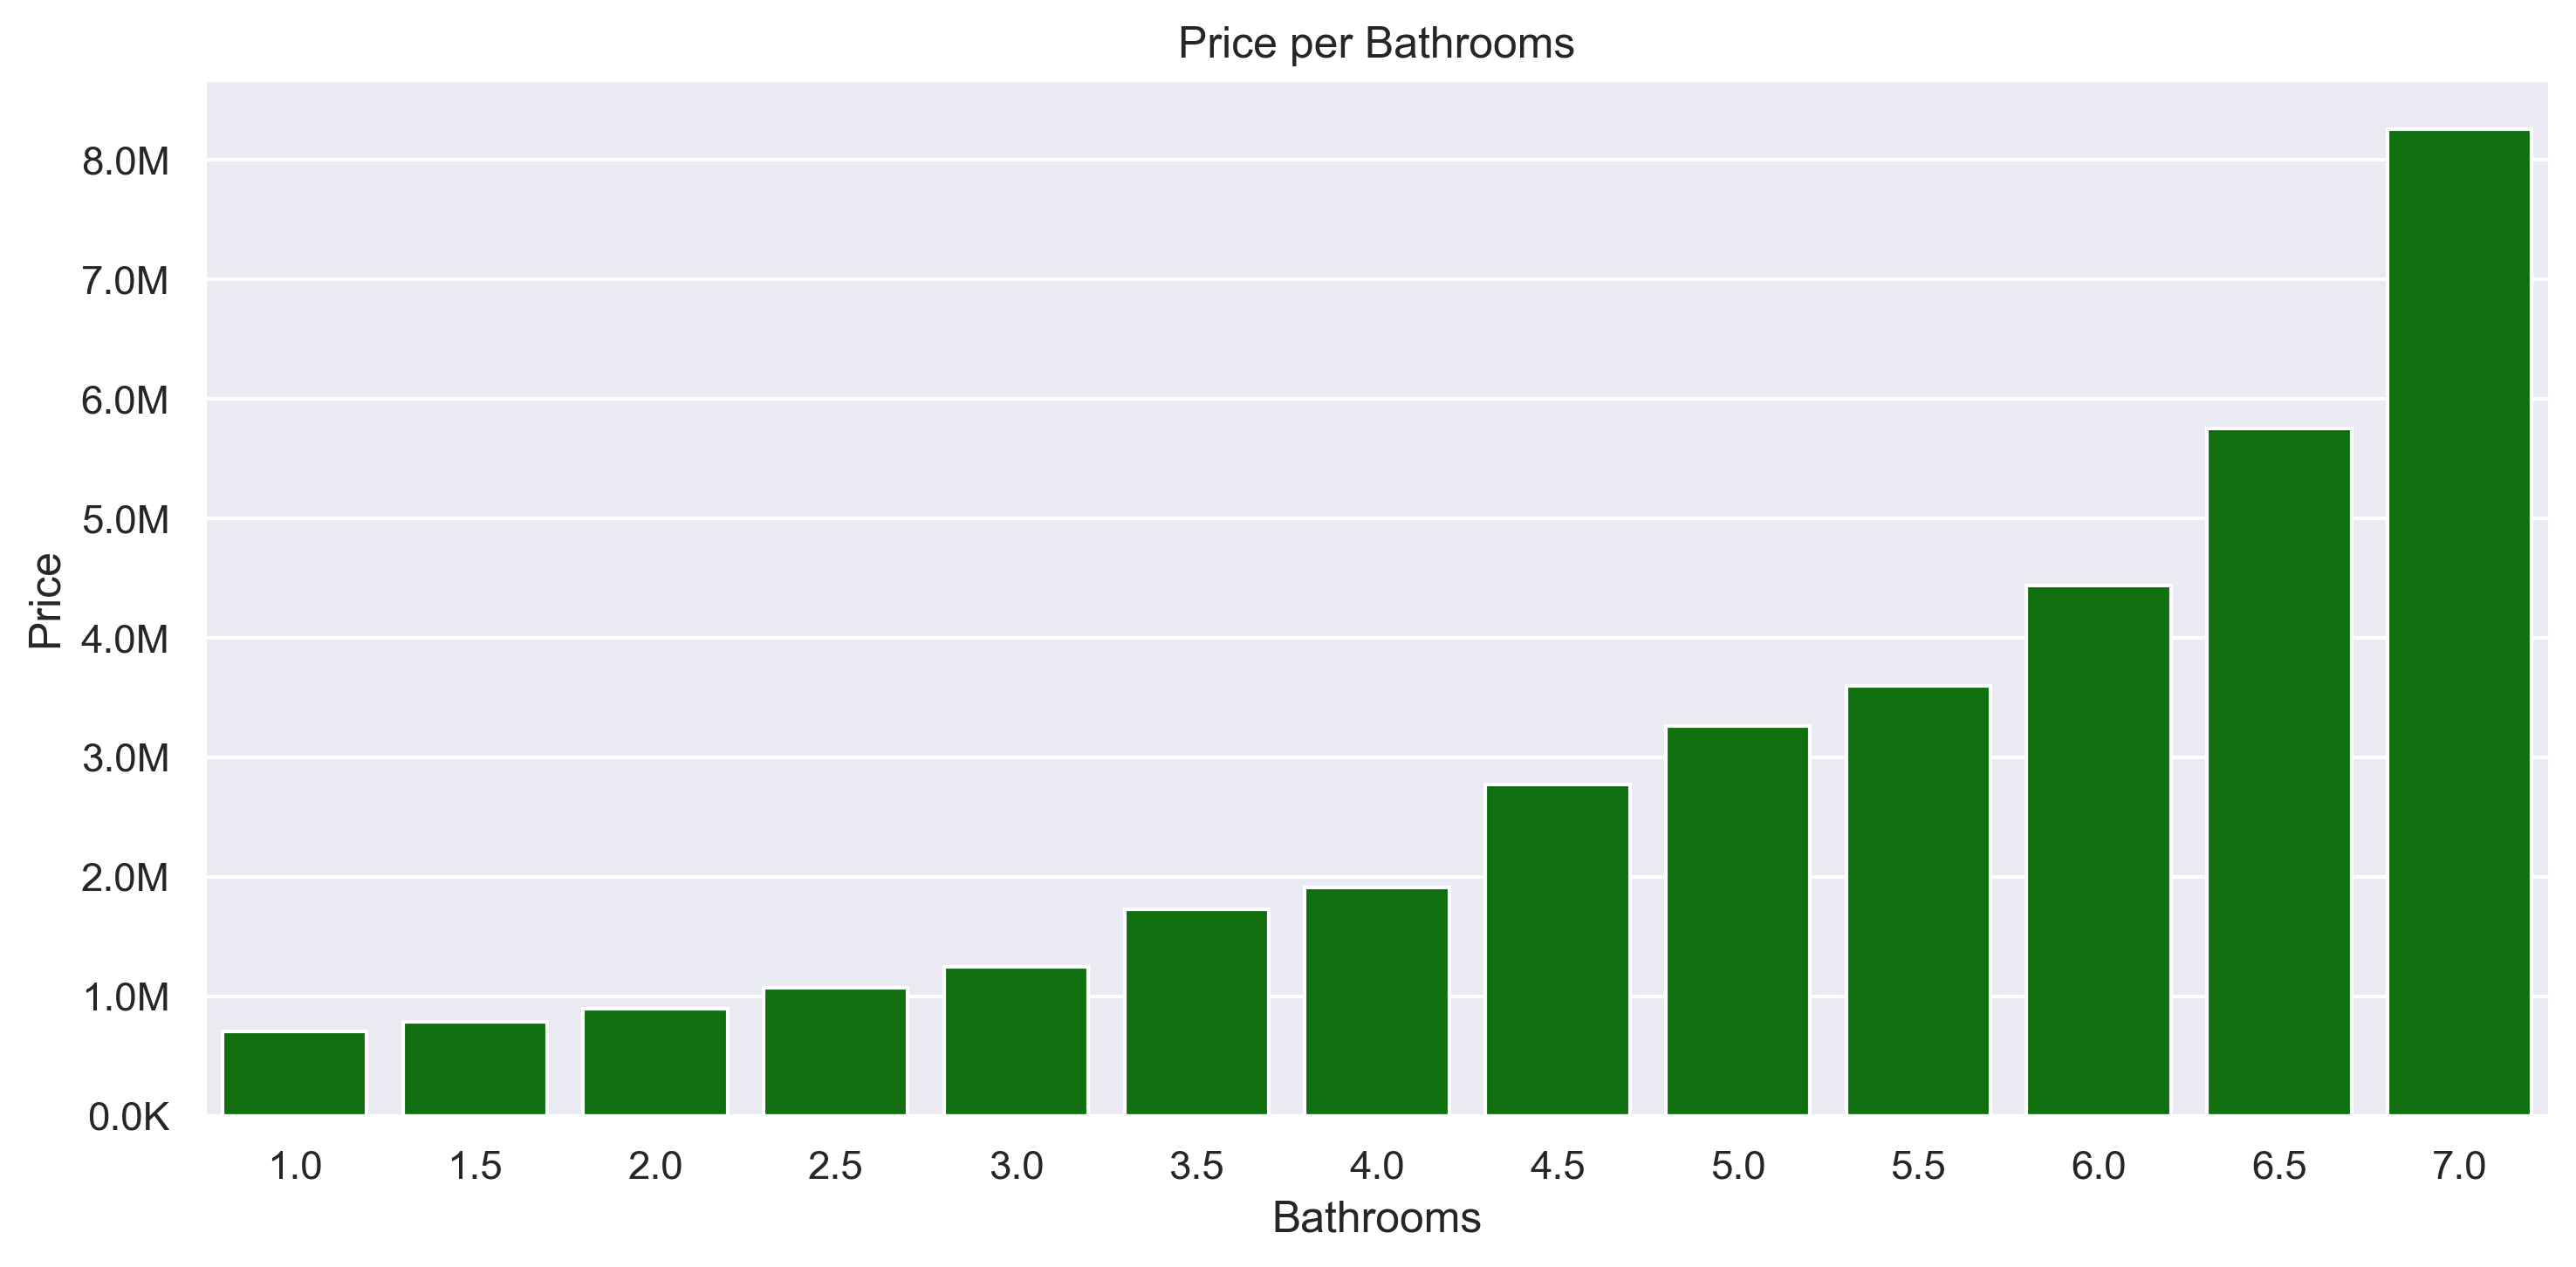

In [85]:
sns.set_theme(style='whitegrid')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

def format_number(data_value,indx):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    else:
        formatter = '{:1.1f}K'.format(data_value * 0.001)
    return formatter
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='bathrooms', y='price', data=df_cat, ci=0, color='green')
ax.set_title('Price per Bathrooms')
ax.set_ylabel('Price')
ax.set_xlabel('Bathrooms')
ax.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.show()

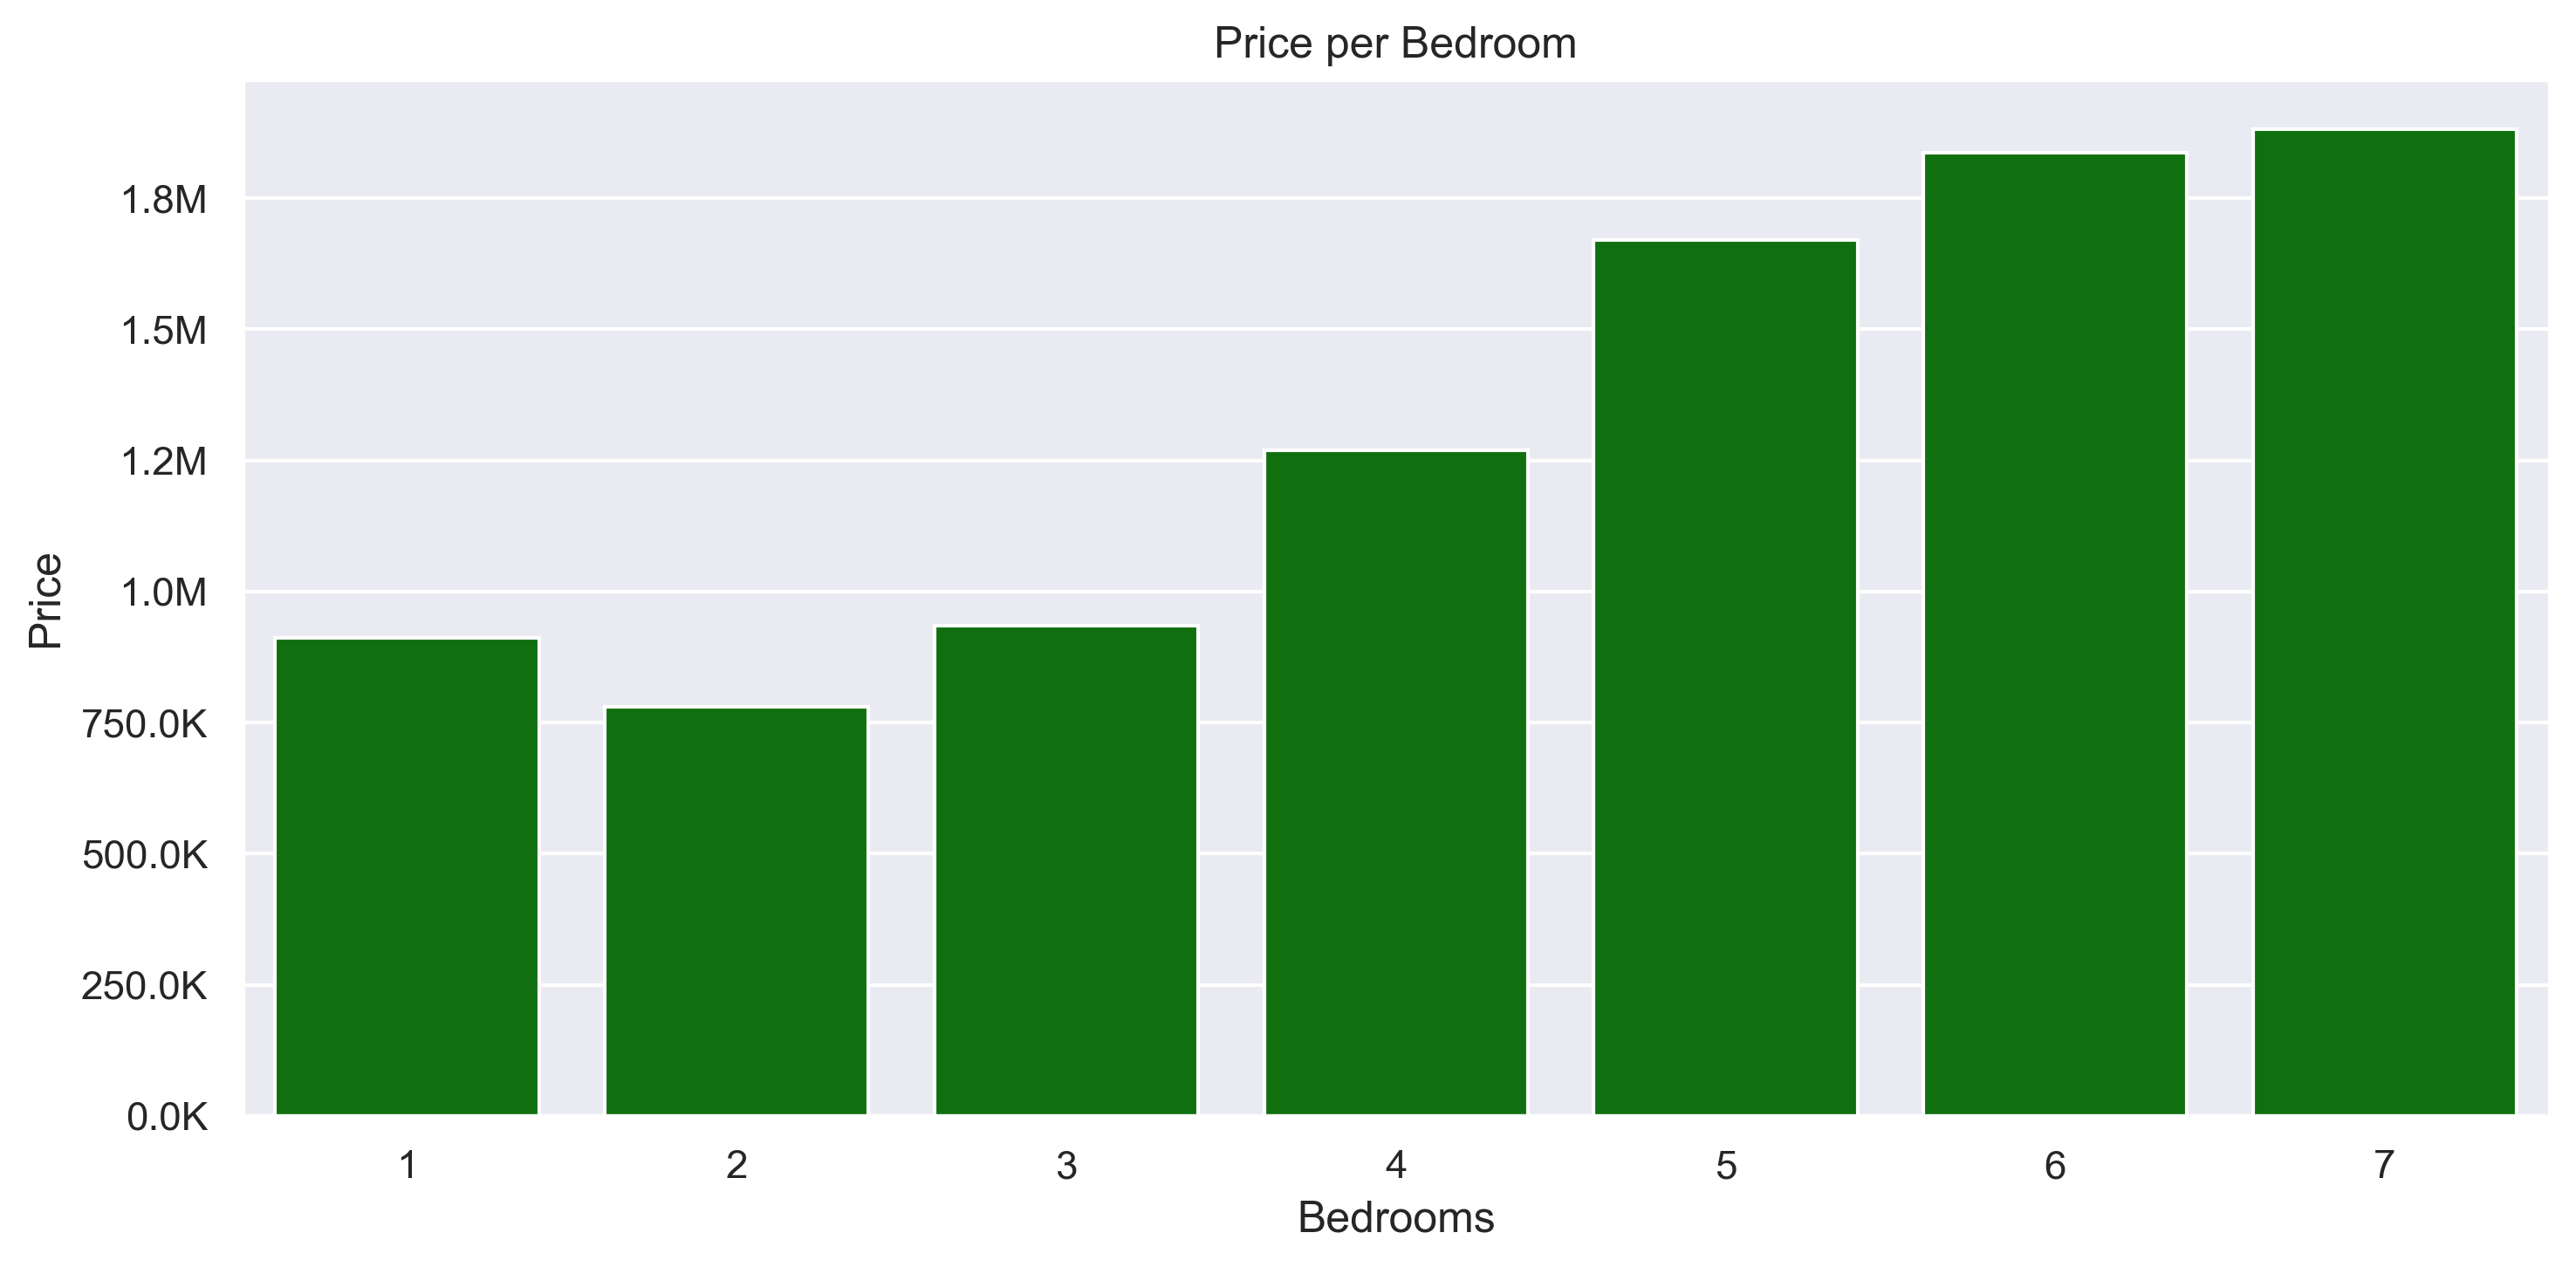

In [75]:
def format_number(data_value,indx):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    else:
        formatter = '{:1.1f}K'.format(data_value * 0.001)
    return formatter
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='bedrooms', y='price', data=df_cat, ci=0, color='green')
ax.set_title('Price per Bedroom')
ax.set_ylabel('Price')
ax.set_xlabel('Bedrooms')
ax.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.show()

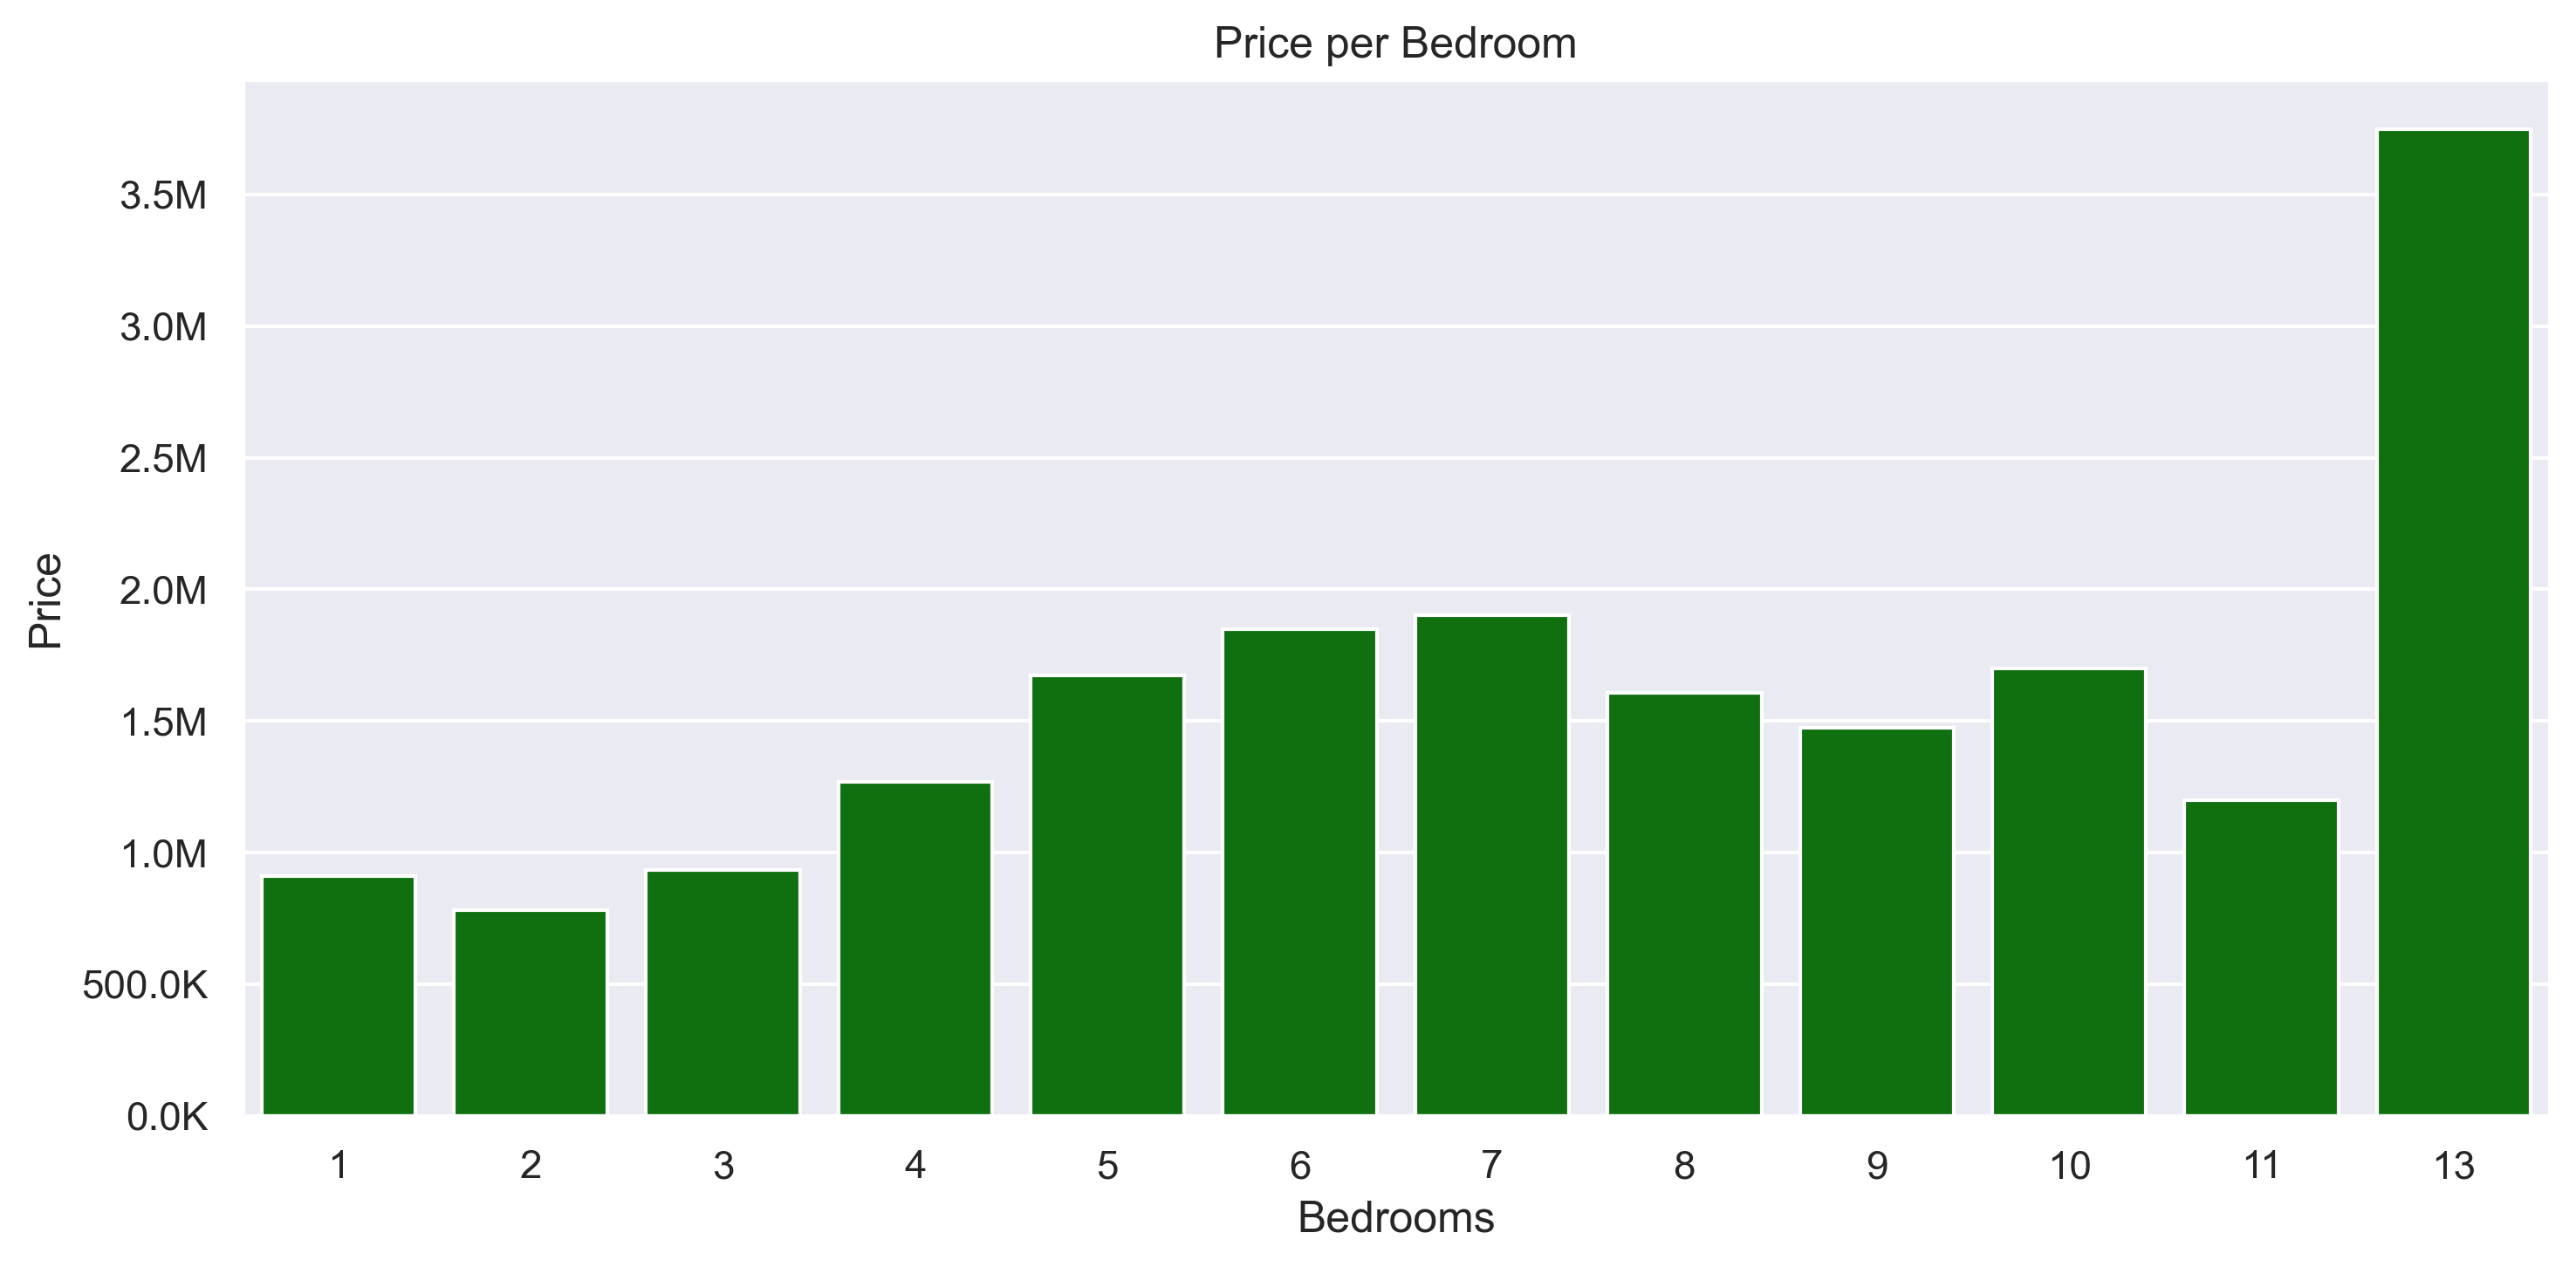

In [77]:
def format_number(data_value,indx):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    else:
        formatter = '{:1.1f}K'.format(data_value * 0.001)
    return formatter
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='bedrooms', y='price', data=df_cat, ci=0, color='green')
ax.set_title('Price per Bedroom')
ax.set_ylabel('Price')
ax.set_xlabel('Bedrooms')
ax.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.show()

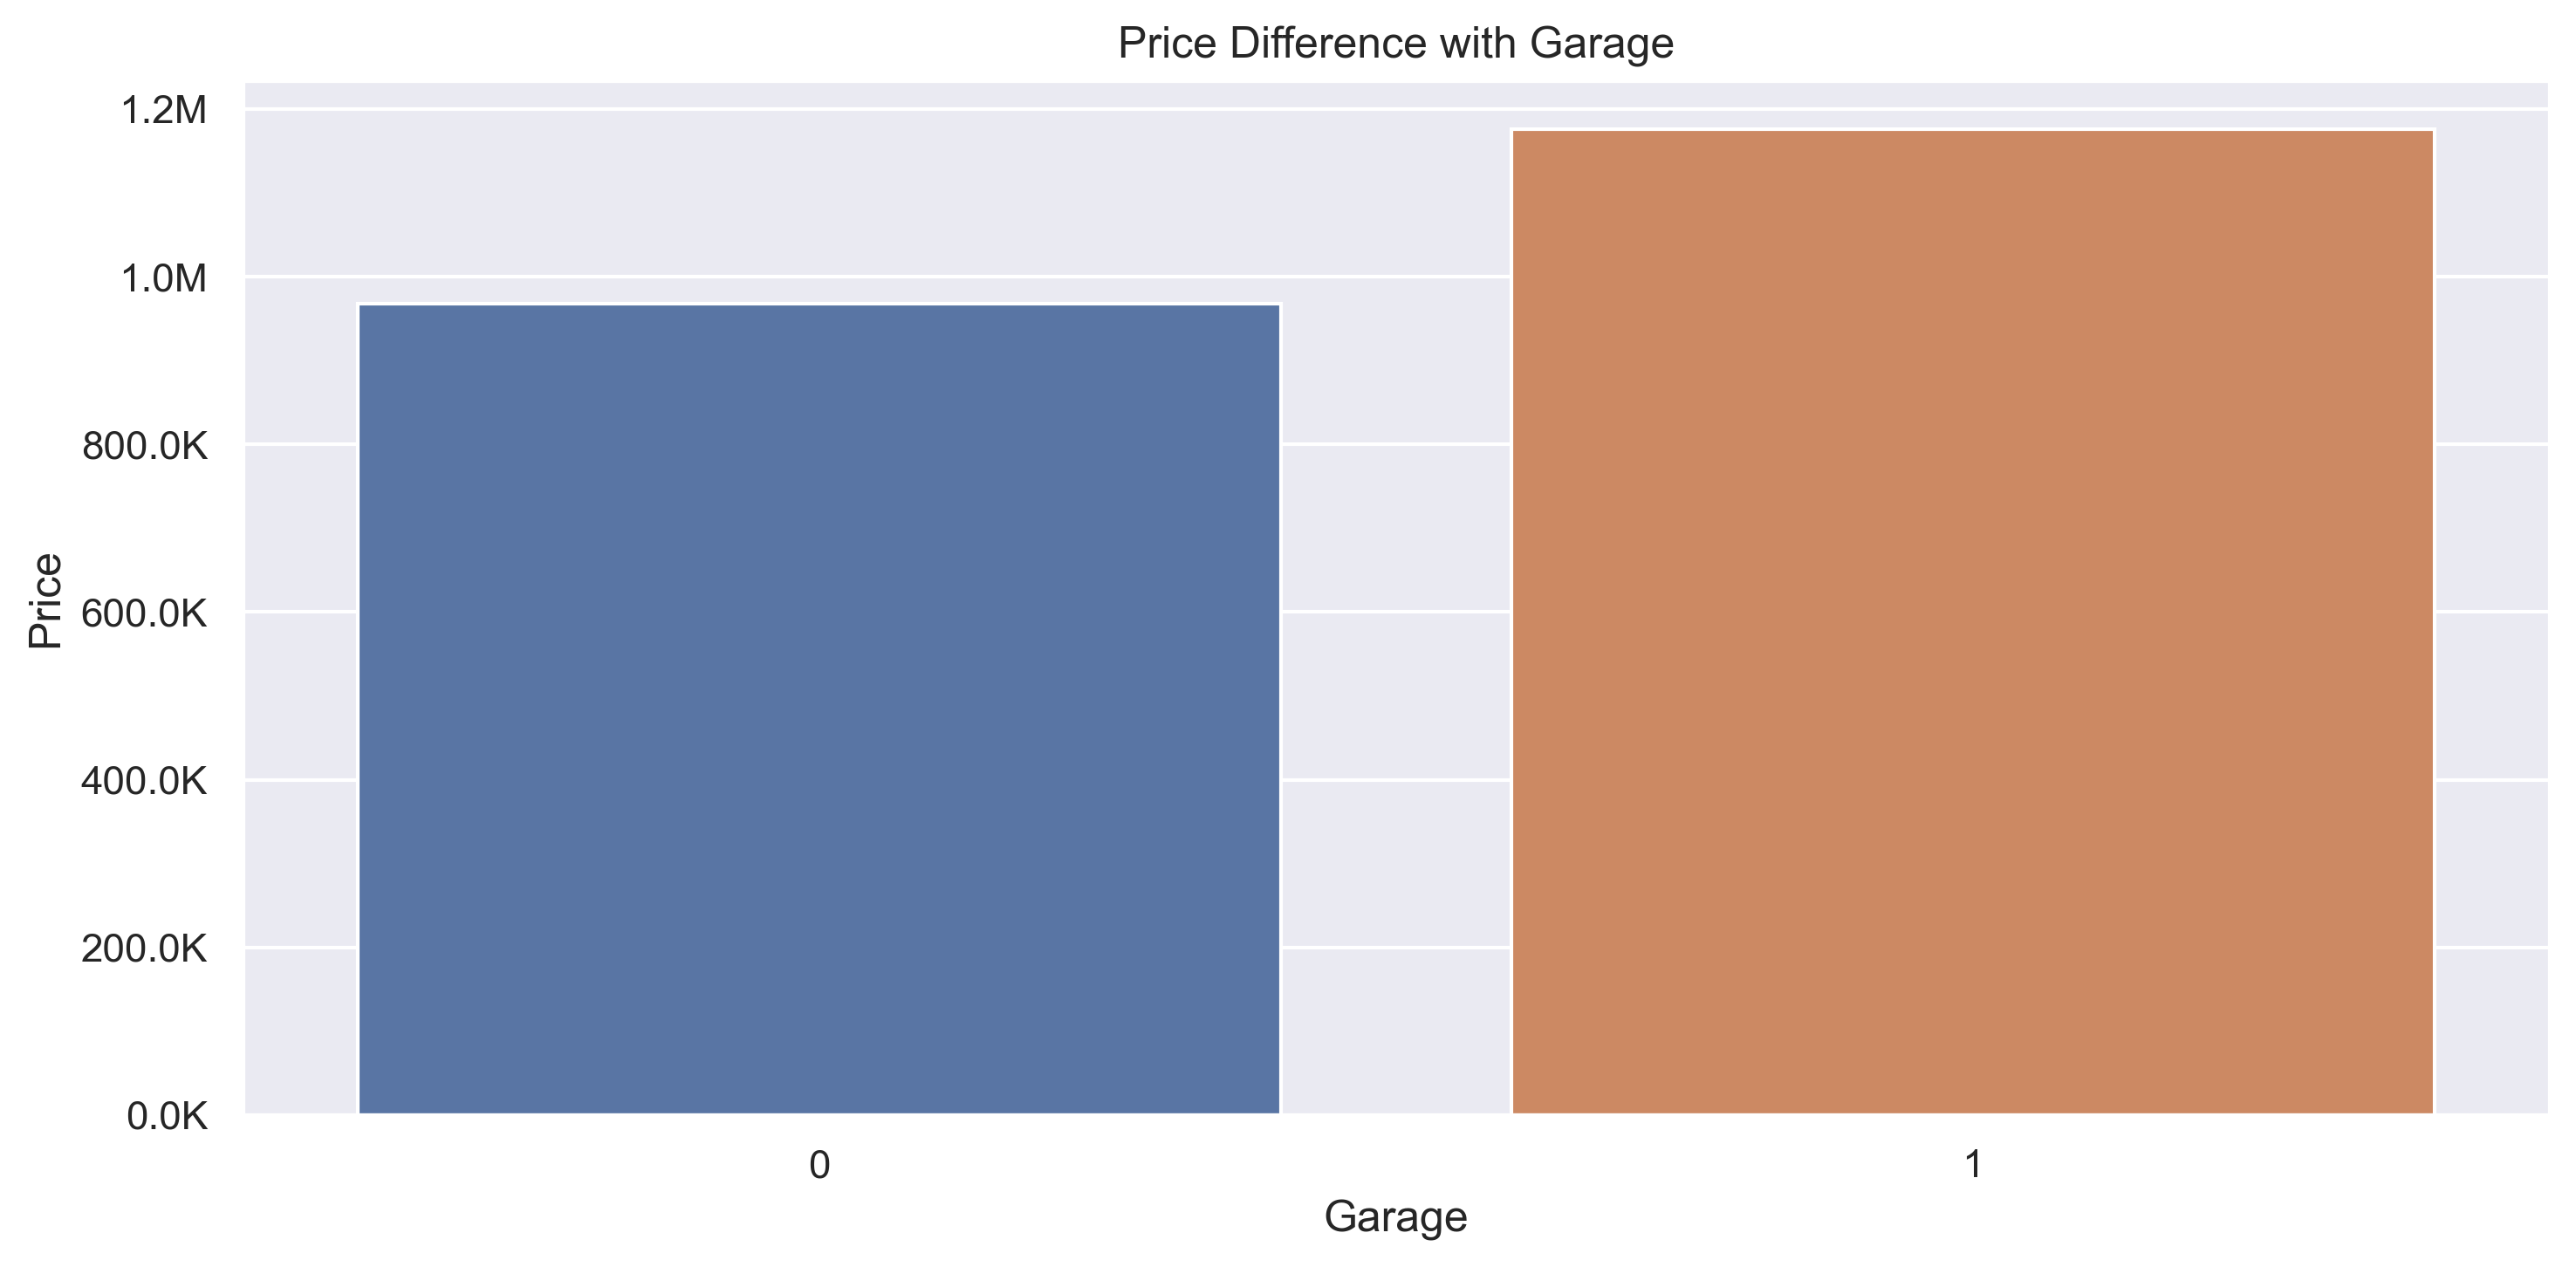

In [72]:
def format_number(data_value,indx):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    else:
        formatter = '{:1.1f}K'.format(data_value * 0.001)
    return formatter
fig, ax = plt.subplots(figsize=(10,5))
labels=['No', 'Yes']
sns.barplot(x='sqft_garage', y='price', data=df_cat, ci=0)
ax.set_title('Price Difference with Garage')
ax.set_ylabel('Price')
ax.set_xlabel('Garage')


ax.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.show()

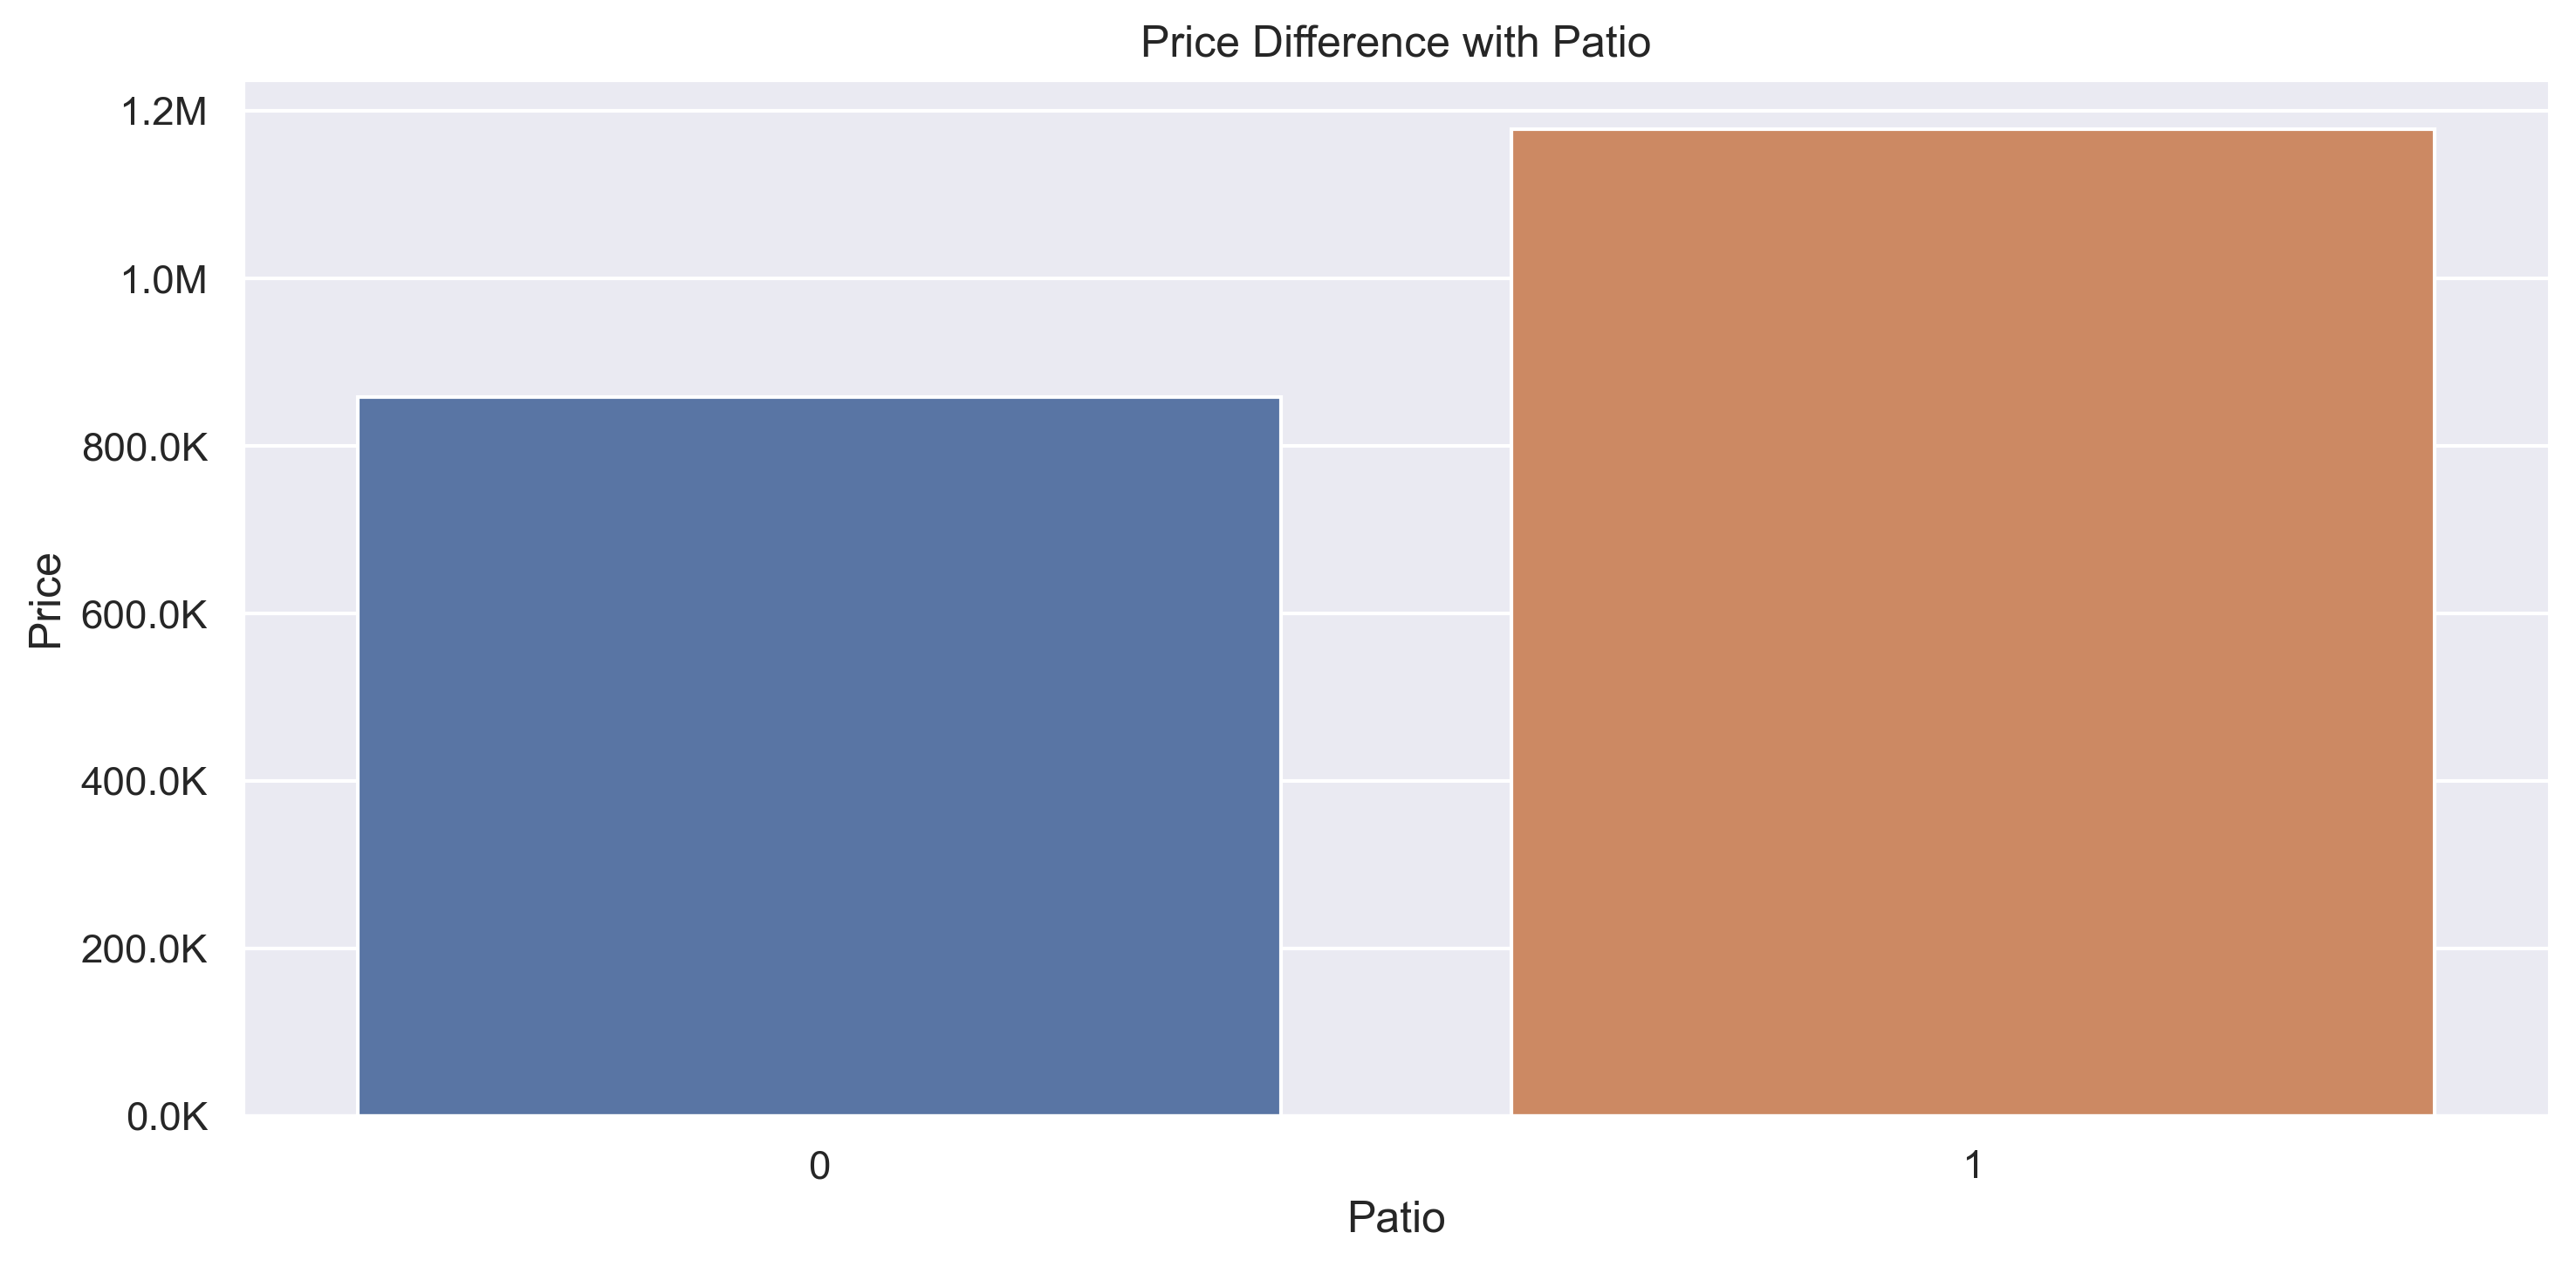

In [73]:
def format_number(data_value,indx):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    else:
        formatter = '{:1.1f}K'.format(data_value * 0.001)
    return formatter
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='sqft_patio', y='price', data=df_cat, ci=0)
ax.set_title('Price Difference with Patio')
ax.set_ylabel('Price')
ax.set_xlabel('Patio')
ax.legend_
ax.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.show()